In [1]:
from script_figure import AIC_length_model_OU as AIC_length_model
from script_figure import matrix_infered_OU as matrix_infered
from script_figure import plot_error_and_accuracy as plot_error_accuracy
from script_figure import plot_error_dim_OU as plot_error_dim
from script_figure import plot_error_and_accuracy
import seaborn as sns
import importlib, os
from _helper._load_csv import aggreagate_csv_from_cluster
import importlib
import SFFI.util_plot as ut 
import matplotlib.pyplot as plt
from script_figure import plot_trajectory
from script_figure import labels_plot
import SFFI.SBR_progression as l
from script_figure.helper_figure import add_letter
from simulation_models.Ornstein_Uhlenbeck import OrnsteinUhlenbeck
from simulation_models.figure_1_model import Figure1Model
from simulation_models.lorenz import Lorenz
import _helper._load_csv as lcsv
import importlib

ut.set_favorite_plot_config()
importlib.reload(l)
aggreagate_csv_from_cluster(select_file="", path=os.path.abspath('') + "/csv")
aggreagate_csv_from_cluster(select_file="lorenz", path=os.path.abspath('') + "/csv")

model_class_OU = OrnsteinUhlenbeck

Look in  /home/andonis/These/Jupyter/PASTIS_PRL_github/csv
['lotka_volterra_dim_7_n.pkl', 'OrnsteinUhlenbeck_repulsive_gaussian_n.pkl', 'OrnsteinUhlenbeck_repulsive_gaussian_diffusion_strength.pkl', 'large_deviation_dim_8.pkl', 'large_deviation_dim_3.pkl', 'large_deviation_dim_6.pkl', 'OrnsteinUhlenbeck_dim_10_n.pkl', 'lotka_volterra_dim_7_benchmark_sindy_n.pkl', 'lorenz_critical_constant_noise_p_n.pkl', 'Misspecified_model_figure_1_diffusion_strength.pkl', 'lotka_volterra_dim_7_p_n.pkl', 'grayscott_dt.pkl', 'OrnsteinUhlenbeck_p_dim_10_n.pkl', 'grayscott_n.pkl', 'grayscott_p_n.pkl', 'grayscott_diffusion_strength.pkl', 'lorenz_critical_constant_noise_n.pkl', 'lorenz_critical_constant_noise_experimental_noise.pkl', 'lorenz_critical_constant_noise_diffusion_vs_time_diffusion_strength.pkl', 'lotka_volterra_dim_7_diffusion_strength.pkl', 'lorenz_critical_constant_noise_dt.pkl', 'large_deviation_dim_7.pkl', 'large_deviation_dim_9.pkl', 'large_deviation_dim_10.pkl', 'large_deviation_dim_5.pkl

In [2]:
df = lcsv.read_csv("Misspecified_model_figure_1_n.pkl")
df["size_model"] = df["base_infered"].apply(lambda x: len(x))
df[(df.time == df.time.unique()[-1]) & (df.method == df.method.unique()[-3])].__len__()

[Errno 2] No such file or directory: 'Misspecified_model_figure_1_n.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/Misspecified_model_figure_1_n.pkl'


85

[Errno 2] No such file or directory: 'Misspecified_model_figure_1_n.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/Misspecified_model_figure_1_n.pkl'
[Errno 2] No such file or directory: 'Misspecified_model_figure_1_n.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/Misspecified_model_figure_1_n.pkl'
[Errno 2] No such file or directory: 'Misspecified_model_figure_1_n.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/Misspecified_model_figure_1_n.pkl'
{'kwargs': {'dt': 0.001, 'n': 1000000, 'diffusion_strength': 0.4}}
index real base 1
total base 21


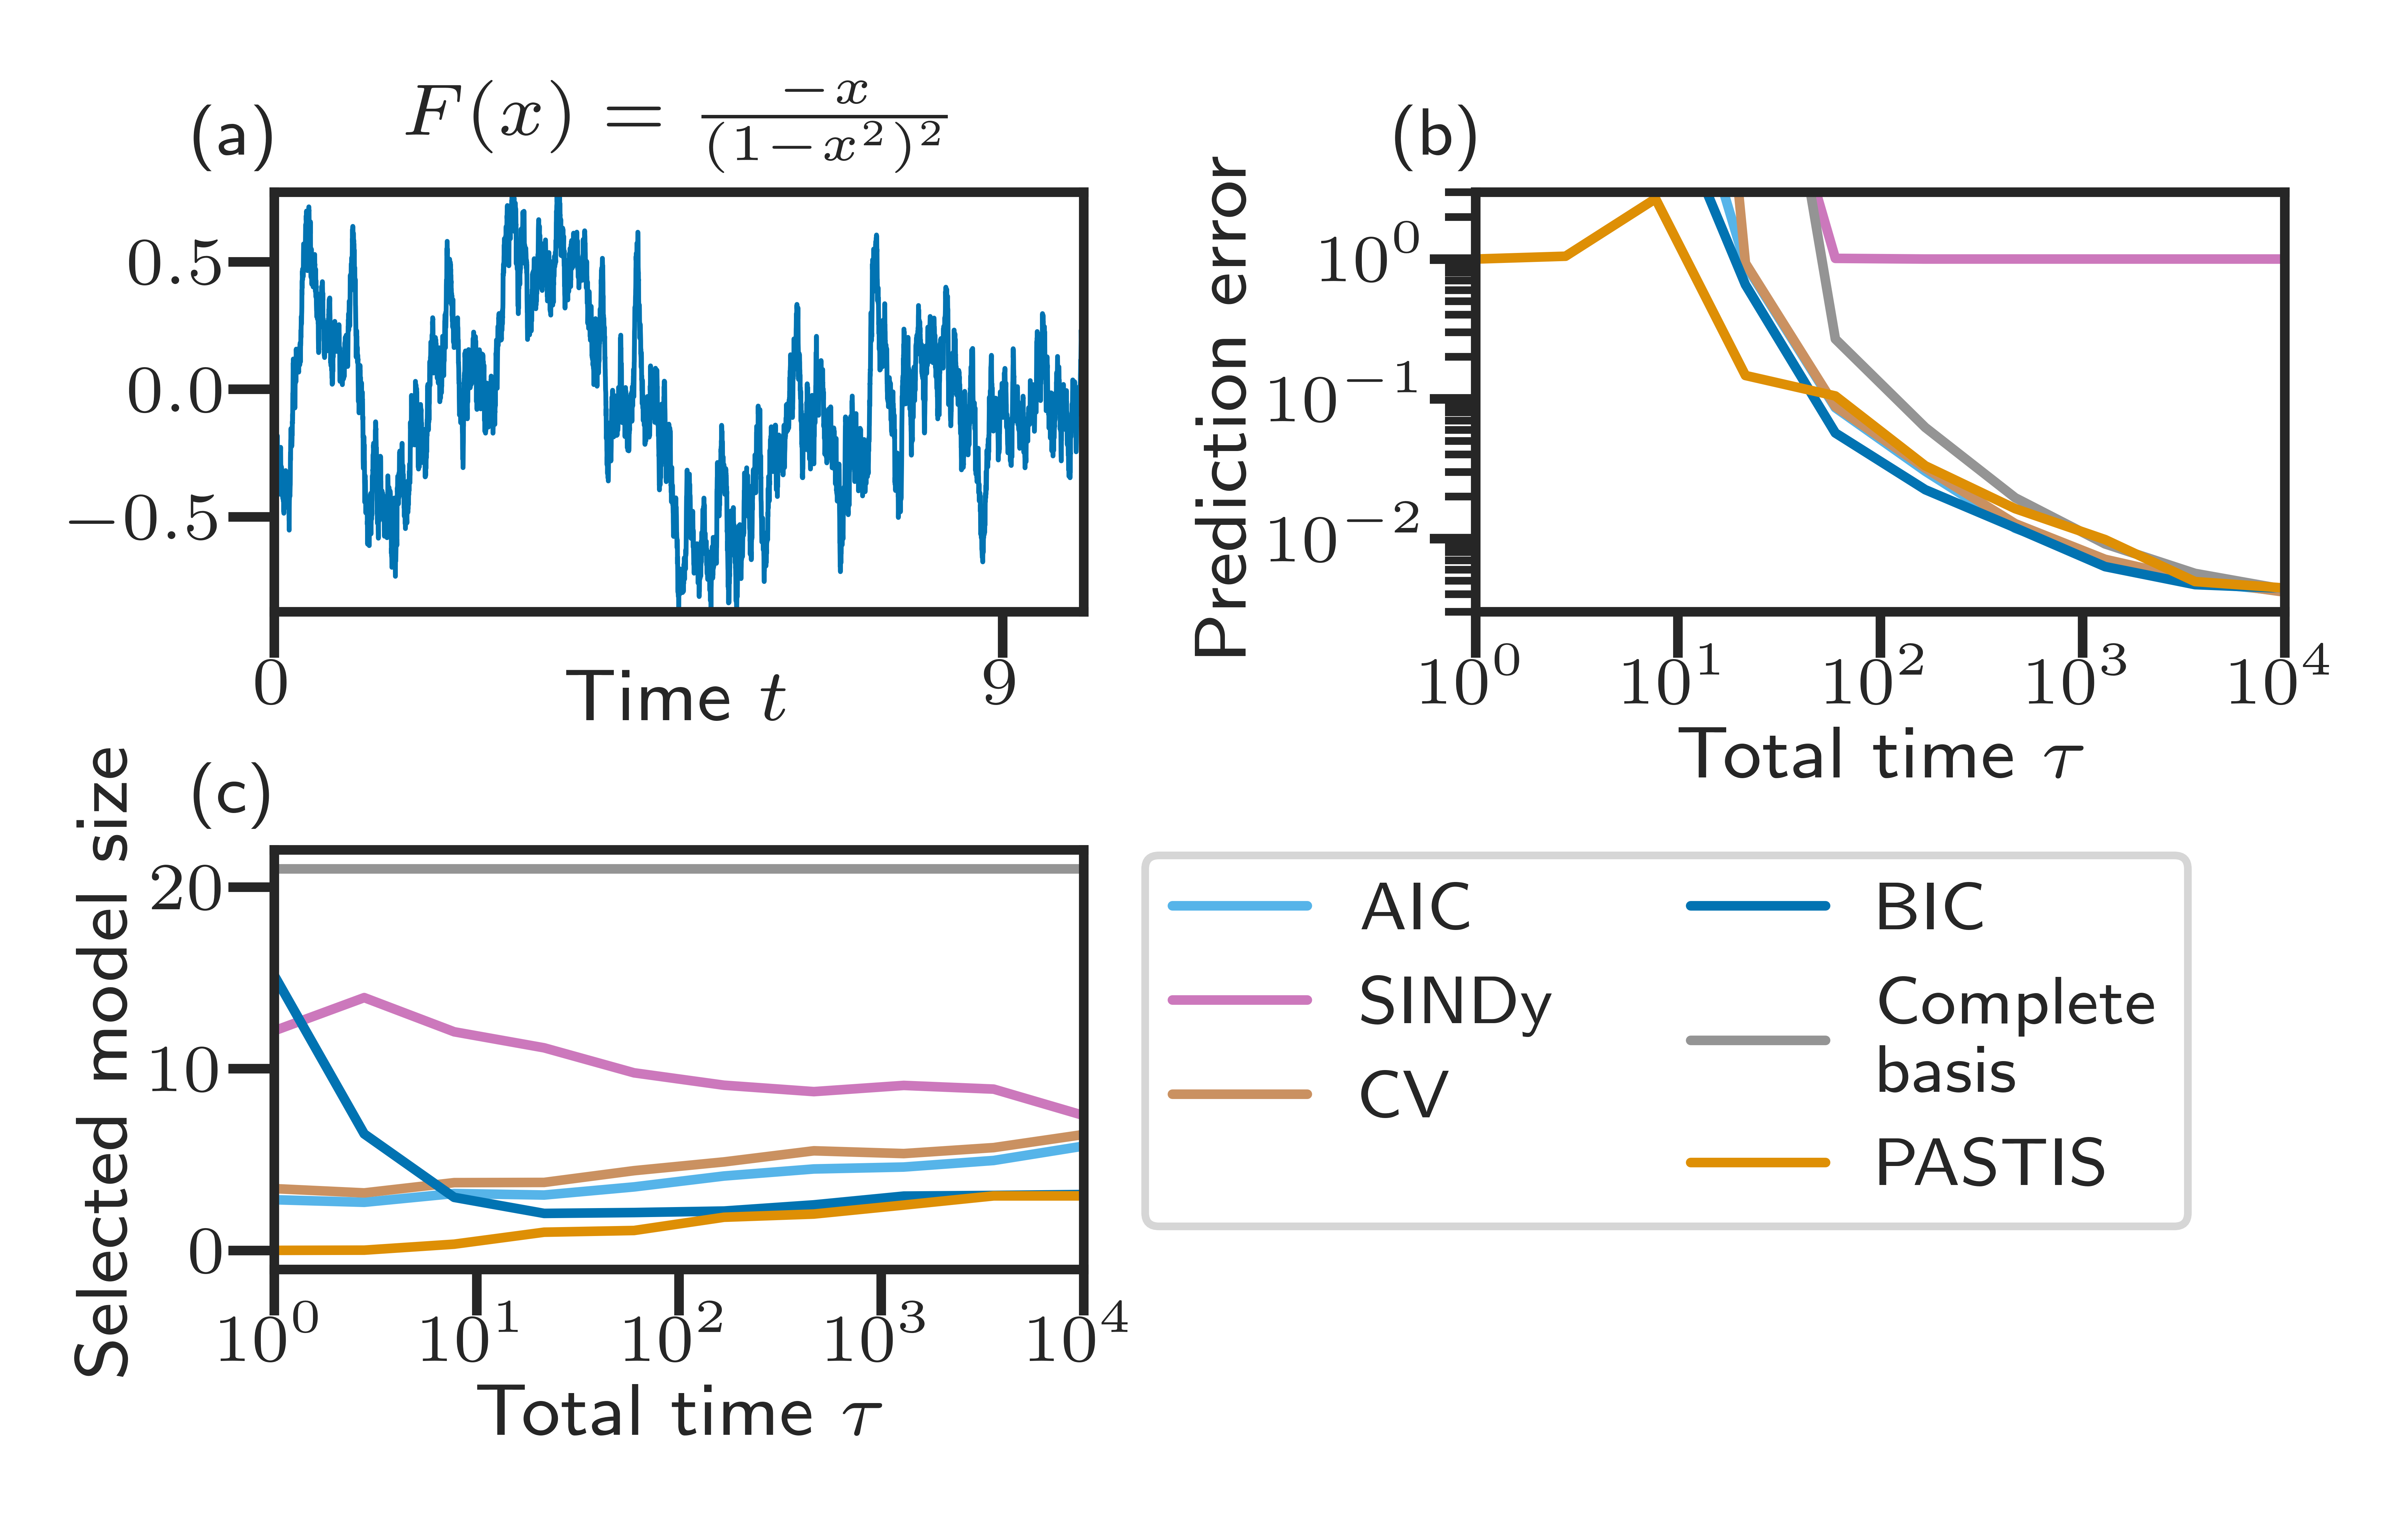

[Errno 2] No such file or directory: 'OrnsteinUhlenbeck_repulsive_gaussian_n.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/OrnsteinUhlenbeck_repulsive_gaussian_n.pkl'
[Errno 2] No such file or directory: 'OrnsteinUhlenbeck_repulsive_gaussian_n.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/OrnsteinUhlenbeck_repulsive_gaussian_n.pkl'
OrnsteinUhlenbeck_repulsive_gaussian_n.pkl
[Errno 2] No such file or directory: 'OrnsteinUhlenbeck_repulsive_gaussian_n.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/OrnsteinUhlenbeck_repulsive_gaussian_n.pkl'


ValueError: solve: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (m,m),(m,n)->(m,n) (size 2 is different from 3)

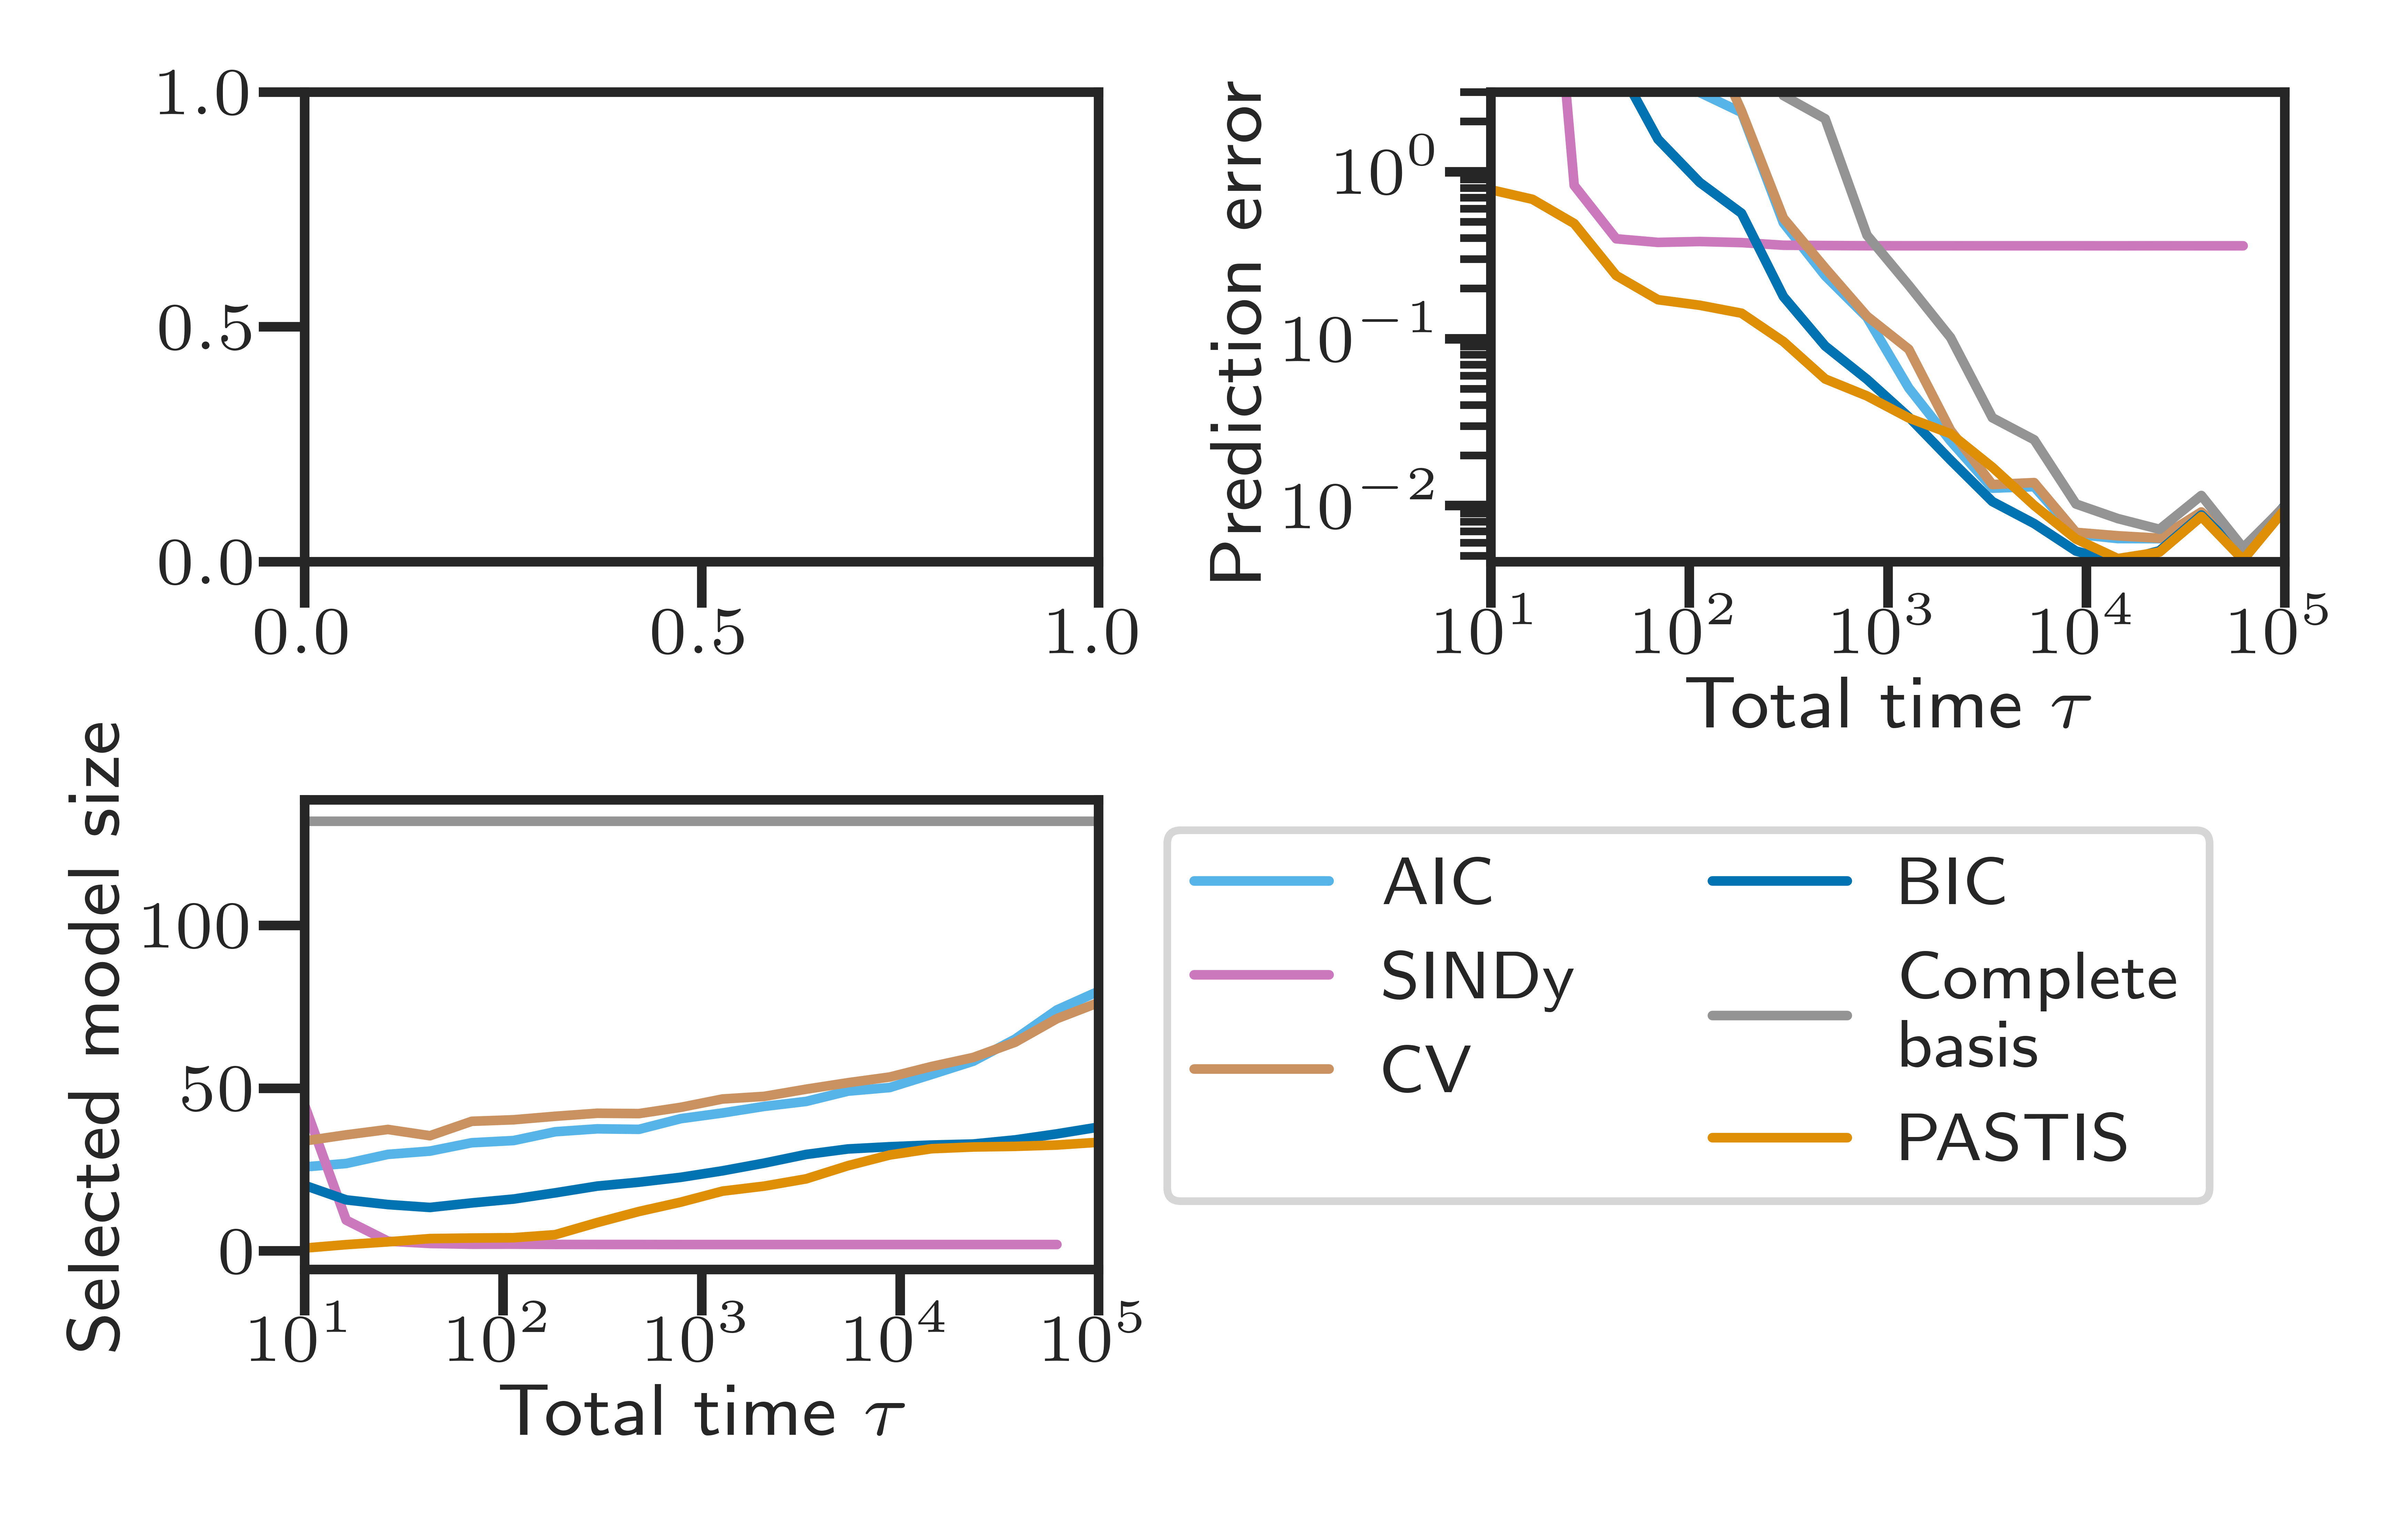

In [3]:
from matplotlib import ticker as mticker
from typing import Union, Type
importlib.reload(plot_trajectory)
importlib.reload(labels_plot)
importlib.reload(ut)
ut.set_favorite_plot_config()


def plot_global(name_csv_base = "OrnsteinUhlenbeck_repulsive_gaussian", model: Union[Type[OrnsteinUhlenbeck], Type[Figure1Model]] = model_class_OU,  save_fig=False, y_max=None, y_min=None):
	name_csv_D_strength = name_csv_base + "_diffusion_strength.pkl"
	name_csv_time = name_csv_base + "_n.pkl"

	n_rows, n_cols = 2, 2
	fig = plt.figure(figsize=ut.set_size(width="article", fraction=1, subplots=(n_rows, n_cols), scale_height=1), layout="constrained")
	gs = fig.add_gridspec(nrows=n_rows, ncols=n_cols)
	gs_1 = gs[0,0]
	gs_2 = gs[0,1]
	gs_3 = gs[1,0]
	gs_4 = gs[1,1]
 
	method_to_plot = ["AIC", "BIC", "PASTIS",  r"$\text{PASTIS}_p$", "Complete basis", "CV" , "SINDy"]
									
	axs_1 = plot_error_and_accuracy.plot_from_csv(name_csv_time, 
											parameter="time",
											method_to_plot=method_to_plot,
											axs=[fig.add_subplot(gs_2)],
											l_y_plot=["predictive_error"],	
                                            add_legend_on_line=False,
                                            legend=True,
                                            max_y_axis=y_max,
                                            min_y_axis=y_min,	
                                			errorbar=None,		
											lw=1,
											#marker="o",
											#ms=3,

												)
	axs_1[0].xaxis.set_major_locator(mticker.LogLocator(base=10.0, numticks=10))
   
	df = lcsv.read_csv(name_csv_time)
	df["size_model"] = df["base_infered"].apply(lambda x: len(x))
    
	axs_2 = plot_error_and_accuracy.plot_from_csv(name_csv_time, 
											parameter="time",
											method_to_plot=method_to_plot,
											axs=[fig.add_subplot(gs_3)],
											l_y_plot=["size_model"],
		   									verbose=False,
                                            add_legend_on_line=False,  
                                            df=df,
                                            errorbar=None,
                                            legend=False,
                                            lw=1,
												)
	axs_2[0].set_ylabel("Selected model size")
	axs_2[0].xaxis.set_major_locator(mticker.LogLocator(base=10.0, numticks=10))
	#axs_2[0].legend(loc="upper left", bbox_to_anchor=(-0.5, -1), fontsize=5)
	handles, labels = axs_1[0].get_legend_handles_labels()
	labels = [l if l != "Complete basis" else "Complete\nbasis" for l in labels]
	leg = axs_1[0].legend(handles=handles, labels=labels, loc="upper left", bbox_to_anchor=(-0.45, -0.5), ncols=2)
	leg.set_in_layout(False)
 
	ax = fig.add_subplot(gs_4)
	ax.set_axis_off()
   
	if model != Figure1Model:
		print(name_csv_time)
		ax_0 = plot_trajectory.plot_trajectory_Lorenz_simple(name_csv_time, model,  ax=fig.add_subplot(gs_1), parameter="time", parameters_value_plot=[10], time_max = 10, width=0.05)
		ax_0.set_title(r"$\bm{F}\begin{pmatrix}x \\ y\end{pmatrix} = -\begin{pmatrix}2 & 2 \\ -2 & 2\end{pmatrix}\begin{pmatrix}x \\ y\end{pmatrix} + 10 \begin{pmatrix}x \\ y\end{pmatrix} e^{-(x^2+y^2)}$", fontsize=5)
		add_letter(ax_0, "a", x=-0.2, y=0.8)	
	else:
		ax_0 = plot_trajectory.plot_trajectory_Lotka_Volterra_simple(name_csv_time, model, ax= fig.add_subplot(gs_1), parameter="time", parameters_value_plot=[10], lw=0.5, max_time=10)
		ax_0.set_xlabel(r"Time $t$", labelpad=-5)	
		ax_0.set_title(r"$F(x)=\frac{-x}{(1-x^2)^2}$")
		add_letter(ax_0, "a", x=-0.1)
	
	x_letter = -0.1
	add_letter(axs_1[0], "b", x=x_letter)
	add_letter(axs_2[0], "c", x=x_letter)

	#fig.suptitle(name_csv_base)
	if save_fig:
		plt.savefig("figures/%s.svg"%name_csv_base, bbox_inches='tight')#plt.savefig("figures/%s.svg"%name_csv_base, bbox_inches='tight')
	plt.show()
 
plot_global(name_csv_base="Misspecified_model_figure_1", model=Figure1Model, y_max=3, y_min=0.003, save_fig=True)
plot_global(save_fig=True, y_max=3)